In [2]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:

GOOGLE_API_KEY=os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT=os.getenv("LANGCHAIN_PROJECT")

In [4]:

os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"]= GROQ_API_KEY
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_PROJECT"]=LANGCHAIN_PROJECT

In [5]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma

USER_AGENT environment variable not set, consider setting it to identify your requests.


model(embedding, gemini-1.0-pro) = https://ai.google.dev/gemini-api/docs/models/gemini

In [13]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.0-pro")

c:\Users\sunny\LangGraph-End-to-End-Course\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


chatGroq_mode = https://console.groq.com/docs/models

HuggingFaceMode = https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2

In [55]:
'''from langchain_huggingface import HuggingFaceEmbeddings
embeddings=HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")'''
from langchain_groq import ChatGroq
import os
llm=ChatGroq(model_name="Gemma2-9b-It")

### Simple AI Assistant

In [14]:
while True:
    question=input("type your question. if you want to quit the chat write quit")
    if question !="quit":
        print(llm.invoke(question).content)
    else:
        print("goodbye take care yourself")
        break

Hello there! How can I assist you today?
goodbye take care yourself


ChatHistory Message = https://github.com/langchain-ai/langchain/blob/master/libs/core/langchain_core/chat_history.py

### 1. BaseChatMessageHistory
What it is: An abstract class or blueprint.

Purpose: Defines the structure and methods that every chat history management system must follow.

Key Features:
It is not functional on its own.
Provides a common interface for implementing custom chat history storage (e.g., in-memory, database, or cloud-based storage).

Example Use Case: If you need to store chat history in a database (e.g., MongoDB), you would extend BaseChatMessageHistory to implement the logic for saving and retrieving messages.

### 2. InMemoryChatMessageHistory
What it is: A concrete implementation of BaseChatMessageHistory.

Purpose: Provides an in-memory storage solution for chat histories.

Key Features:
Stores messages in RAM.
Easy to use for prototyping or lightweight systems.
Loses the data when the application shuts down.

Example Use Case: Use this if you are building a small chatbot prototype where persistent storage isn't required.

### 3. RunnableWithMessageHistory
What it is: A specialized tool that combines:
**A runnable**: A reusable computational component (e.g., a task like calling an AI model or an API).
**Message history management**: Access to and integration of chat history.

Purpose: Enables workflows or tasks to make decisions or computations while using message history as context.

Key Features:
Makes message history available during the execution of tasks.
Useful for chaining tasks that depend on previous messages in a conversation.

Example Use Case: If you want to build a chatbot where:
The AI uses the full history of the conversation to provide relevant responses.
The chatbot performs computations or calls external tools based on the conversation context.

### 4. AIMessage
What it is: A data structure to represent a message specifically from the AI.

Purpose: Differentiates between different types of messages (AIMessage, HumanMessage, SystemMessage).

Key Features:
Represents only the AI's responses in the conversation.
Used to organize and classify messages in chat histories.

Example Use Case: Use this to structure responses generated by the AI so they can be stored or processed consistently.

In [1]:
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.chat_history import InMemoryChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_core.messages import AIMessage

In [ ]:
store={}

In [ ]:

def get_session_history(session_id: str) -> BaseChatMessageHistory:
    if session_id not in store:
        store[session_id] = InMemoryChatMessageHistory()
    return store[session_id]

In [ ]:
# if we start conversation this is thread_id = 1, if i shutdown and again after sometime i start conversation then now this new conversation
#  will be thread_id = 2
#  configurable is used to specify unique parameters for the conversation
config = {"configurable": {"session_id": "firstchat"}}

In [ ]:
model_with_memory=RunnableWithMessageHistory(llm,get_session_history) # combine run llm and history along with accessing previous history

In [ ]:
# config tells that this message belongs to the conversation session with ID "firstchat"
model_with_memory.invoke(("Hi! I'm sunnysavita"),config=config).content

In [ ]:
model_with_memory.invoke(("tell me what is my name?"),config=config).content

runnables_github = https://github.com/langchain-ai/langchain/blob/master/libs/core/langchain_core/runnables/base.py

RunnablePassthrough() = just only take input and pass input as-is to the next step

RunnableLambda(): allows to define custom logic using a lambda function (or any callable Python function)

 RunnableParallel() = run multiple tasks in parallel. It executes several child runnables concurrently and collects their outputs

model = https://huggingface.co/BAAI/bge-base-en-v1.5

In [15]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import Chroma
from langchain import PromptTemplate
from langchain_core.runnables import RunnableParallel, RunnablePassthrough , RunnableLambda
from langchain_core.output_parsers import StrOutputParser # structure and organize the ouput and display it in a nice formate

### Reading the txt files from source directory

loader = DirectoryLoader('../data', glob="./*.txt", loader_cls=TextLoader)
docs = loader.load()

### Creating Chunks using RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=50,
    chunk_overlap=10,
    length_function=len
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

###  BGE Embddings

'''from langchain.embeddings import HuggingFaceBgeEmbeddings

model_name = "BAAI/bge-base-en-v1.5"
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': True} # set True to compute cosine similarity mean after vector embidded all vector will be normalize
embeddings = HuggingFaceBgeEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs,
)
'''

### Creating Retriever using Vector DB

db = Chroma.from_documents(new_docs, embeddings)
retriever = db.as_retriever(search_kwargs={"k": 4})

In [16]:
template = """Answer the question based only on the following context:
{context}

Question: {question}
"""
prompt = PromptTemplate.from_template(template)


In [17]:

retrieval_chain = (
    RunnableParallel({"context": retriever, "question": RunnablePassthrough()})
    | prompt
    | llm
    | StrOutputParser()
    )

In [19]:
question ="what is llama3? can you highlight 3 important points?"
print(retrieval_chain.invoke(question))

- **Llama 3 is a large language model developed by Google.**
- **It was released in April 2024.**
- **It is used by a variety of services, including Google Search and Gmail.**


# Let's Start with Tools and Agents

agent_docs = https://python.langchain.com/v0.1/docs/modules/agents/

agent_github = https://github.com/langchain-ai/langchain/tree/master/libs/langchain/langchain/agents

In [20]:
from langchain_community.tools import WikipediaQueryRun # allows to query Wikipedia for information directly within a Langchain pipeline
from langchain_community.utilities import WikipediaAPIWrapper # interact with the Wikipedia

In [21]:
# WikipediaAPIWrapper: Automatic WikipediaAPI Call(internally already coded) don’t need to manually specify an API key or link
api_wrapper = WikipediaAPIWrapper(top_k_results=5, doc_content_chars_max=100) # tool to interact with Wikipedia API

In [22]:
tool = WikipediaQueryRun(api_wrapper=api_wrapper)

In [23]:
tool.name

'wikipedia'

In [24]:
tool.description

'A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.'

In [25]:
tool.args

{'query': {'description': 'query to look up on wikipedia',
  'title': 'Query',
  'type': 'string'}}

In [26]:
tool.return_direct

False

In [27]:
print(tool.run({"query": "langchain"}))

Page: LangChain
Summary: LangChain is a framework designed to simplify the creation of applications 


In [28]:
tool.run("langchain")

'Page: LangChain\nSummary: LangChain is a framework designed to simplify the creation of applications '

### Create a custom tool **WikiInputs** using Langchain

In [29]:
# BaseModel: A class to define data models that automatically validate input data using "Pydantic" Python type annotations.
# Field: A function to customize the behavior of fields in the model, such as defining default values or validation constraints.
from langchain_core.pydantic_v1 import BaseModel, Field

c:\Users\sunny\LangGraph-End-to-End-Course\venv\lib\site-packages\IPython\core\interactiveshell.py:3577: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
# serves as data validation structure that defines structure of input data(query) that WikipediaQueryRun tool will expect.
# So according to thie WikiInputs() query should be a string, and ideally, it should consist of 3 words or fewer.
class WikiInputs(BaseModel):
    query: str = Field(description="query to look up in Wikipedia, should be 3 or less words")

In [31]:
tool=WikipediaQueryRun(
    name="wiki-tool", # name of this tool
    description="look up things in wikipedia", # description of what the tool does
    args_schema=WikiInputs, # Validating input query
    api_wrapper=api_wrapper, # class that is used to interact with Wikipedia API to sending request to Wikipedia and retrieving results
    return_direct=True, # tool should return the result directly without any additional processing or modification
)

ValidationError: 1 validation error for WikipediaQueryRun
args_schema
  Input should be a subclass of BaseModel [type=is_subclass_of, input_value=<class '__main__.WikiInputs'>, input_type=ModelMetaclass]
    For further information visit https://errors.pydantic.dev/2.9/v/is_subclass_of

In [32]:
tool.name

'wikipedia'

In [34]:
tool.description

'look up things in wikipedia'

In [35]:
tool.args

{'query': {'title': 'Query',
  'description': 'query to look up in Wikipedia, should be 3 or less words',
  'type': 'string'}}

In [36]:
tool.return_direct

True

In [37]:
print(tool.run("langchain"))

Page: LangChain
Summary: LangChain is a framework designed to simplify the creation of applications 


# youtube search tool

In [38]:
from langchain_community.tools import YouTubeSearchTool # interact with YouTube API

In [39]:
tool=YouTubeSearchTool() # tool to perform youtub api search and provide information

In [40]:
tool.name

'youtube_search'

In [41]:
tool.description

'search for youtube videos associated with a person. the input to this tool should be a comma separated list, the first part contains a person name and the second a number that is the maximum number of video results to return aka num_results. the second part is optional'

In [42]:
tool.run("sunny savita") # searches YouTube videos based on the query "sunny savita" and provides links to the videos

"['https://www.youtube.com/watch?v=Ik8gNjJ-13I&pp=ygUMc3Vubnkgc2F2aXRh', 'https://www.youtube.com/watch?v=ABK00e2XdPo&pp=ygUMc3Vubnkgc2F2aXRh']"

### Web Search tool

In [43]:
from langchain_community.tools.tavily_search import TavilySearchResults # interact with web search

In [44]:
tool = TavilySearchResults() # tool to perform web searches and retrieve information(url and content) from online sources.

In [45]:
tool.invoke({"query": "What happened in the latest burning man floods"})

[{'url': 'https://www.npr.org/2023/09/03/1197497458/the-latest-on-the-burning-man-flooding',
  'content': "There are also reports that at least one person has died at the counterculture festival about a hundred miles north of Reno, Nev. Earlier this afternoon, I caught up with NPR's Claudia Peschiutta, who's at her first burn, and she told me it's muddy where she is, but that she and her camp family have been making the best of things.\n National\nThe latest on the Burning Man flooding\nClaudia Peschiutta\nAuthorities are investigating a death at the Burning Man festival in the Nevada desert after tens of thousands of people are stuck in camps because of rain.\n SCOTT DETROW, HOST:\nKnee-deep mud, warnings to conserve food and water, orders to shelter in place - this is all at Burning Man 2023 after torrential rains turned the Black Rock Desert into miles and miles of mud. I mean, mostly what I've seen from my personal experience is just any sort of need that you have, somebody, whethe

In [ ]:
from langchain.agents import AgentType
from langchain.agents import load_tools
from langchain.agents import initialize_agent

Set up an AI Agent: The code initializes an AI agent capable of answering questions.

Check LLM Knowledge: It first tries to answer using the LLM's internal knowledge.

Use External Tool: If the LLM lacks the answer, it uses the Wikipedia tool to fetch real-time information.

Combine Results: The agent combines the LLM's response and Wikipedia's data (if fetched) to provide an accurate answer.

In [ ]:
tool = load_tools(["Wikipedia"], llm=llm)
agent = initialize_agent(tool, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)

In [ ]:
agent.run("What is current GDP of India?")

### creates and executes an agent-based AI system using LangChain and OpenAI
When a query is passed:

OpenAI attempts to generate a response using its trained knowledge.

If it can't, it calls external tools or APIs for real-time or specific data.

The external tool provides the data, and OpenAI integrates it into the final answer.

This ensures accurate, dynamic, and comprehensive responses.

In [46]:
from langchain import hub # pull prebuilt templates or prompts from the LangChain community or repository.

**OpenAI Function Calling** it is just calling third party tools, APIs or databases for the information.

A **OpenAI Function Calling**  allows OpenAI to interact with external tools, systems, or sources of information to:

Expand its knowledge beyond what it was trained on.

Perform specific tasks like searching the web, making calculations, querying databases, or calling APIs.

**Function Calling doc** = https://platform.openai.com/docs/guides/function-calling

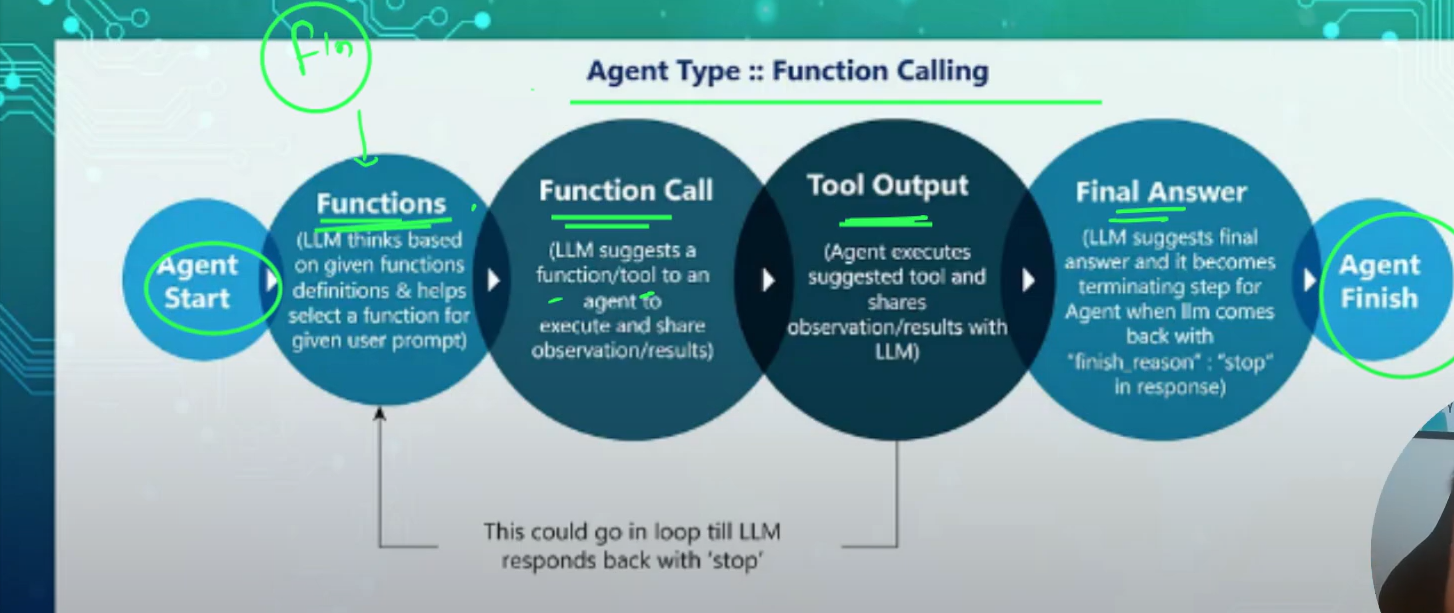

In [51]:
from langchain.agents import AgentExecutor # execution engine that runs the agent and interacts with the tools
from langchain.agents import create_openai_functions_agent # create specific type of agent that can utilize OpenAI's function-calling capabilities

prebuilt_prompt_template = https://smith.langchain.com/hub/langchain-ai/openai-functions-template

In [48]:
instructions = """You are an assistant."""
base_prompt = hub.pull("langchain-ai/openai-functions-template") # Pulls a prebuilt prompt template from the LangChain Hub
prompt = base_prompt.partial(instructions=instructions)

In [63]:
tavily_tool = TavilySearchResults() # tool to perform web or news-based searches

In [64]:
tools = [tavily_tool] # tavily_tool is added to the tools list, making it available to the agent for use during execution

In [65]:
# Creates an OpenAI Functions Calling Agent to interact openAI with external tools, system, source of information so that it can retrieve real time data also.
agent = create_openai_functions_agent(llm, tools, prompt)

In [66]:
agent_executor = AgentExecutor(
    agent=agent,
    tools=tools,
    verbose=True, # detailed logging of the agent's execution process
)

In [67]:
print(agent_executor.invoke({"input": "who was the mahatma gandhi"}))

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



Invoking: `tavily_search_results_json` with `{'query': 'who was the mahatma mahatma gandhi'}`


[{'url': 'https://historycooperative.org/stay-story-mahatma-gandhi/', 'content': "Mahatma Gandhi, also known as Mohandas Karamchand Gandhi, was a prominent figure in India's struggle for independence from British rule. His approach to non-violent protest and civil disobedience became a beacon for peaceful movements worldwide. Gandhi's beliefs in simplicity, non-violence, and truth had a profound impact on the world, influencing other leaders like Martin Luther"}, {'url': 'https://www.britannica.com/summary/Mahatma-Gandhi', 'content': 'Mahatma Gandhi summary\nExplore the life of Mahatma Gandhi as a political and social activist\nMahatma Gandhi, byname of Mohandas Karamchand Gandhi,\n(born Oct. 2, 1869, Porbandar, India—died Jan. 30, 1948, Delhi), Preeminent leader of Indian nationalism and prophet of nonviolence in the 20th century.\n He refashioned the Indian National Congress into an effec

# Showcase that one more agent also

# Create our custom agent and custom tools

In [69]:
# Import things that are needed generically
from langchain.pydantic_v1 import BaseModel, Field
from langchain.tools import BaseTool, StructuredTool, tool
from pydantic import BaseModel

In [71]:
@tool
def search(query: str) -> str:
    """Look up things online."""
    return "LangChain"

In [72]:
print(search.name)
print(search.description)
print(search.args)

search
Look up things online.
{'query': {'title': 'Query', 'type': 'string'}}


In [73]:
@tool
def multiply(a: int, b: int) -> int:
    """Multiply two numbers."""
    return a * b

In [74]:
print(multiply.name)
print(multiply.description)
print(multiply.args)

multiply
Multiply two numbers.
{'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}


In [76]:
class SearchInput(BaseModel):
    query: str = Field(description="should be a search query")

In [77]:

@tool("search-tool", args_schema=SearchInput, return_direct=True)
def search(query: str) -> str:
    """Look up things online."""
    return "LangChain"

In [78]:
print(search.name)
print(search.description)
print(search.args)
print(search.return_direct)

search-tool
Look up things online.
{'query': {'title': 'Query', 'type': 'string'}}
True


c:\Users\sunny\LangGraph-End-to-End-Course\venv\lib\site-packages\pydantic\json_schema.py:2191: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='should be a search query' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)


In [ ]:
from typing import Optional, Type

from langchain.callbacks.manager import (
    AsyncCallbackManagerForToolRun,
    CallbackManagerForToolRun,
)

In [79]:
class SearchInput(BaseModel):
    query: str = Field(description="should be a search query")

In [80]:
class CalculatorInput(BaseModel):
    a: int = Field(description="first number")
    b: int = Field(description="second number")

# here is my custom tool

In [82]:
from langchain.agents import tool
@tool
def get_word_length(word: str) -> int:
    """Returns the length of a word."""
    return len(word)

In [83]:
get_word_length.invoke("abc")

3

In [84]:
tools = [get_word_length]

In [85]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are very powerful assistant, but don't know current events",
        ),
        ("user", "{input}"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ]
)

In [86]:
llm_with_tools = llm.bind_tools(tools)

In [88]:
from langchain.agents.format_scratchpad.openai_tools import (
    format_to_openai_tool_messages,
)
from langchain.agents.output_parsers.openai_tools import OpenAIToolsAgentOutputParser



In [89]:
agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_to_openai_tool_messages(
            x["intermediate_steps"]
        ),
    }
    | prompt
    | llm_with_tools
    | OpenAIToolsAgentOutputParser()
)

In [90]:
from langchain.agents import AgentExecutor

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [91]:
list(agent_executor.stream({"input": "How many letters in the word eudca"}))



> Entering new AgentExecutor chain...

Invoking: `get_word_length` with `{'word': 'eudca'}`


55

> Finished chain.


[{'actions': [ToolAgentAction(tool='get_word_length', tool_input={'word': 'eudca'}, log="\nInvoking: `get_word_length` with `{'word': 'eudca'}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_4188', 'function': {'arguments': '{"word":"eudca"}', 'name': 'get_word_length'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls'}, id='run-6cc153ac-50f7-468e-871a-bb81fd15b1f7', tool_calls=[{'name': 'get_word_length', 'args': {'word': 'eudca'}, 'id': 'call_4188', 'type': 'tool_call'}], usage_metadata={'input_tokens': 966, 'output_tokens': 86, 'total_tokens': 1052}, tool_call_chunks=[{'name': 'get_word_length', 'args': '{"word":"eudca"}', 'id': 'call_4188', 'index': 0, 'type': 'tool_call_chunk'}])], tool_call_id='call_4188')],
  'messages': [AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_4188', 'function': {'arguments': '{"word":"eudca"}', 'name': 'get_word_length'}, 'type': 'fu

[{'actions': [ToolAgentAction(tool='get_word_length', tool_input={'word': 'eudca'}, log="\nInvoking: `get_word_length` with `{'word': 'eudca'}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_4188', 'function': {'arguments': '{"word":"eudca"}', 'name': 'get_word_length'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls'}, id='run-6cc153ac-50f7-468e-871a-bb81fd15b1f7', tool_calls=[{'name': 'get_word_length', 'args': {'word': 'eudca'}, 'id': 'call_4188', 'type': 'tool_call'}], usage_metadata={'input_tokens': 966, 'output_tokens': 86, 'total_tokens': 1052}, tool_call_chunks=[{'name': 'get_word_length', 'args': '{"word":"eudca"}', 'id': 'call_4188', 'index': 0, 'type': 'tool_call_chunk'}])], tool_call_id='call_4188')],
  'messages': [AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_4188', 'function': {'arguments': '{"word":"eudca"}', 'name': 'get_word_length'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls'}, id='run-6cc153ac-50f7-468e-871a-bb81fd15b1f7', tool_calls=[{'name': 'get_word_length', 'args': {'word': 'eudca'}, 'id': 'call_4188', 'type': 'tool_call'}], usage_metadata={'input_tokens': 966, 'output_tokens': 86, 'total_tokens': 1052}, tool_call_chunks=[{'name': 'get_word_length', 'args': '{"word":"eudca"}', 'id': 'call_4188', 'index': 0, 'type': 'tool_call_chunk'}])]},
 {'steps': [AgentStep(action=ToolAgentAction(tool='get_word_length', tool_input={'word': 'eudca'}, log="\nInvoking: `get_word_length` with `{'word': 'eudca'}`\n\n\n", message_log=[AIMessageChunk(content='', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_4188', 'function': {'arguments': '{"word":"eudca"}', 'name': 'get_word_length'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_calls'}, id='run-6cc153ac-50f7-468e-871a-bb81fd15b1f7', tool_calls=[{'name': 'get_word_length', 'args': {'word': 'eudca'}, 'id': 'call_4188', 'type': 'tool_call'}], usage_metadata={'input_tokens': 966, 'output_tokens': 86, 'total_tokens': 1052}, tool_call_chunks=[{'name': 'get_word_length', 'args': '{"word":"eudca"}', 'id': 'call_4188', 'index': 0, 'type': 'tool_call_chunk'}])], tool_call_id='call_4188'), observation=5)],
  'messages': [FunctionMessage(content='5', additional_kwargs={}, response_metadata={}, name='get_word_length')]},
 {'output': '5',
  'messages': [AIMessage(content='5', additional_kwargs={}, response_metadata={})]}]

In [92]:
llm.invoke("How many letters in the word educa")

AIMessage(content='Here\'s how to solve this:\n\n* **Focus on the phrase:**  The question asks about the letters in the phrase "letters in the word educa".\n* **Count carefully:** Count each letter in that phrase.\n\nLet me know if you\'d like me to do the counting for you! \n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 67, 'prompt_tokens': 16, 'total_tokens': 83, 'completion_time': 0.121818182, 'prompt_time': 0.00024042, 'queue_time': 0.042495864, 'total_time': 0.122058602}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-ed352c53-84e7-48d6-9576-0acd99befd1f-0', usage_metadata={'input_tokens': 16, 'output_tokens': 67, 'total_tokens': 83})

In [93]:
from langchain_core.prompts import MessagesPlaceholder

MEMORY_KEY = "chat_history"
prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are very powerful assistant, but bad at calculating lengths of words.",
        ),
        MessagesPlaceholder(variable_name=MEMORY_KEY),
        ("user", "{input}"),
        MessagesPlaceholder(variable_name="agent_scratchpad"),
    ]
)

In [94]:
from langchain_core.messages import AIMessage, HumanMessage

chat_history = []

In [95]:
agent = (
    {
        "input": lambda x: x["input"],
        "agent_scratchpad": lambda x: format_to_openai_tool_messages(
            x["intermediate_steps"]
        ),
        "chat_history": lambda x: x["chat_history"],
    }
    | prompt
    | llm_with_tools
    | OpenAIToolsAgentOutputParser()
)

In [96]:
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

In [97]:
input1 = "how many letters in the word educa?"
result = agent_executor.invoke({"input": input1, "chat_history": chat_history})
chat_history.extend(
    [
        HumanMessage(content=input1),
        AIMessage(content=result["output"]),
    ]
)
agent_executor.invoke({"input": "is that a real word?", "chat_history": chat_history})

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")



Invoking: `get_word_length` with `{'word': 'educa'}`


5

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


5

> Finished chain.
Yes. 


> Finished chain.


{'input': 'is that a real word?',
 'chat_history': [HumanMessage(content='how many letters in the word educa?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='5', additional_kwargs={}, response_metadata={})],
 'output': 'Yes. \n'}